In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pyocr
import PIL.Image
%matplotlib inline
from skimage.measure import label
import pdb

In [206]:
class Image(np.ndarray):
    """class for workig with whole images"""
    def __new__(subt, *args):
        return args[0].view(subt)
    
    def resize(self,to_y = 100.):
        ratio = to_y/img.shape[0]
        self = cv2.resize(self, None, fx=ratio, fy=ratio)

    def detect_edges(self,thresh_1=50,thresh_2=100):
        """"applying Canny edge detection to the image"""
        self.edges = cv2.Canny(self, thresh_1, thresh_2) / 255
    
    def parse(self):
        parsed = pyocr.tesseract.image_to_string(self.img(),lang="ukr",builder=pyocr.builders.WordBoxBuilder()) 
        if len(parsed) > 1:
            print "Multiple words found!"
            self.n_words = len(parsed)
            self.words = [self[x.position[0][1]:x.position[1][1],x.position[0][0]:x.position[1][0]] for x in parsed]
            for i in range(self.n_words):
                self.words[i].text = parsed[i].content
            self.text = ''.join([x.text for x in self.words])
            return len(self.words)
        else:
            if len(parsed) == 1:
                self.words = [self[parsed[0].position[0][1]:parsed[0].position[1][1],parsed[0].position[0][0]:parsed[0].position[1][0]]]
                self.words[0].text = parsed[0].content
                self.n_words = 1
                self.box = parsed[0].position
                self.text = parsed[0].content
                return 1
            else:
                print "Nothing found"
                return 0
    def area(self):
        return self.shape[0]*self.shape[1]
    def _repr_png_(self):
        return PIL.Image.fromarray(self)._repr_png_()

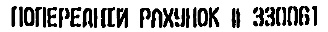

In [178]:
a = Image(cv2.imread('../coloured/colored_[10, 0]im53.jpg',0))
a

In [179]:
info = a.parse() 
if info == 1:
    print a.text
    print a.box
else:
    for word in a.words:
        print word.text

Multiple words found!
ІЮЇІЕРЕЛІІІИ
РЛХШЮК
ІІ
33008]


In [180]:
b = (a < 10).astype(float) * 255
b = cv2.dilate(b,np.ones([1,1]))

In [181]:
labs, n_labs = label(b,background=0 ,connectivity=2, return_num=True)

39


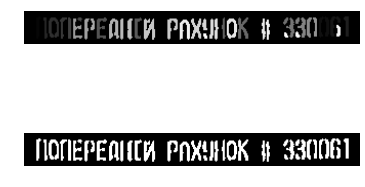

In [182]:
print n_labs
plt.subplot(211)
plt.axis('off')
plt.imshow(labs ,cmap='Greys_r')
plt.subplot(212)
plt.axis('off')
plt.imshow(b,cmap='Greys_r')
plt.show()

In [183]:
def get_elem(labeled, n_elem,image=a,return_pos = False):
    min0 = min(np.argwhere(labeled == n_elem), key=lambda x: x[0])[0]
    min1 = min(np.argwhere(labeled == n_elem), key=lambda x: x[1])[1]
    max0 = max(np.argwhere(labeled == n_elem), key=lambda x: x[0])[0]
    max1 = max(np.argwhere(labeled == n_elem), key=lambda x: x[1])[1]
    return (image[min0:max0,min1:max1], (min0,max0,min1,max1))

In [184]:
words = [x for x in a.words]

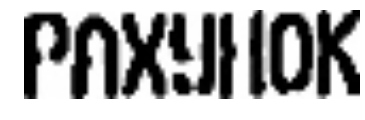

In [207]:
plt.imshow(words[1], cmap='Greys_r')
plt.axis('off')
plt.show()

In [209]:
print a.words[1].text
a.words[1]

РЛХШЮК


In [212]:
def filter(image,letter):
    if letter.shape[0] < image.shape[0]/2. or letter.shape[1] < image.shape[1]/(2.*len(image.text)):
        return False
    if letter.shape[1] > image.shape[1]/2: 
        return False
    else: return True 
    

In [214]:
letters = [get_elem(labs,i) for i in range(n_labs+1) if filter(a,get_elem(labs,i)[0])]

In [215]:
letters[8][0]

In [216]:
lttrs_s = sorted(letters, key = lambda x: x[1][2])

In [230]:
def im_resize(image, dest_y = 70):
    ratio  = float(dest_y) / image.shape[0]
    return Image(cv2.resize(image, None, fx = ratio, fy = ratio))

In [231]:
resized = im_resize(lttrs_s[0][0])

In [232]:
def to_square(image, sq_side = 70):
    sq = np.ones((sq_side,sq_side)) * 255
    margin =(sq_side - image.shape[1])/2
    sq[:,margin:margin+image.shape[1]] = image
    return Image(sq.astype(np.uint8))

In [233]:
res = to_square(resized)

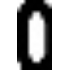

In [235]:
res